In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/MSME Product Sales Data.csv') # dataset downloaded directly from HAB

data

,Date,Mode,Payment Method,Sales Quantity,Price
0,1/9/2023,Online,Online,1,43.636
1,1/9/2023,Dine in,EDC,4,40.909
2,1/9/2023,Dine in,Cash,1,40.909
3,1/9/2023,Dine in,QRIS,1,40.909
4,1/9/2023,Dine in,Cash,1,40.909
...,...,...,...,...,...
3033,6/30/2023,Dine in,Cash,1,40.909
3034,6/30/2023,Dine in,EDC,2,40.909
3035,6/30/2023,Dine in,EDC,1,40.909
3036,6/30/2023,Dine in,EDC,2,40.909


In [3]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [4]:
data['Day'] = pd.DatetimeIndex(data['Date']).day

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data

,Date,Mode,Payment Method,Sales Quantity,Price,Month,Day
0,2023-01-09,Online,Online,1,43.636,1,9
1,2023-01-09,Dine in,EDC,4,40.909,1,9
2,2023-01-09,Dine in,Cash,1,40.909,1,9
3,2023-01-09,Dine in,QRIS,1,40.909,1,9
4,2023-01-09,Dine in,Cash,1,40.909,1,9
...,...,...,...,...,...,...,...
3033,2023-06-30,Dine in,Cash,1,40.909,6,30
3034,2023-06-30,Dine in,EDC,2,40.909,6,30
3035,2023-06-30,Dine in,EDC,1,40.909,6,30
3036,2023-06-30,Dine in,EDC,2,40.909,6,30


In [7]:
monthly_data = pd.DataFrame(data.groupby('Month')['Sales Quantity'].sum().reset_index())
monthly_data = monthly_data.sort_values(by='Sales Quantity', ascending = False)
monthly_data

,Month,Sales Quantity
3,4,753
5,6,658
2,3,604
4,5,602
1,2,483
0,1,429


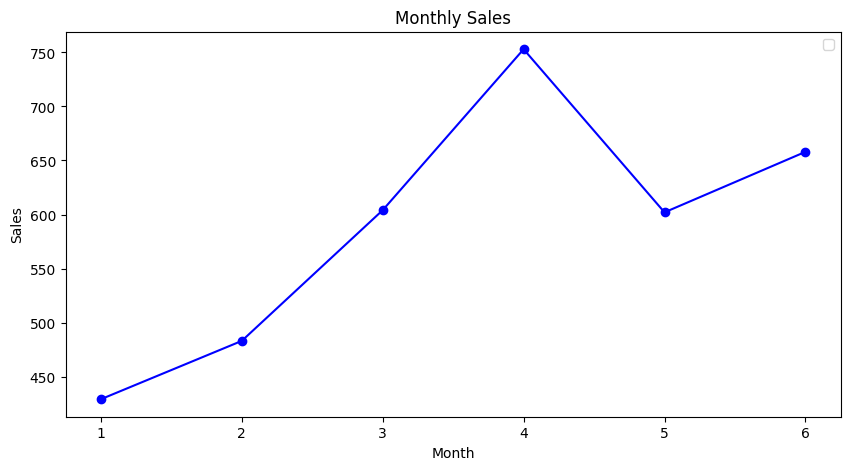

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
mean = data.groupby('Month')['Sales Quantity'].sum()
plt.plot(mean.index, mean, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.legend()
plt.show()

In [9]:
daily_data = pd.DataFrame(data.groupby('Day')['Sales Quantity'].sum().reset_index())
daily_data = daily_data.sort_values(by='Sales Quantity', ascending = False)
daily_data

,Day,Sales Quantity
17,18,175
24,25,143
15,16,141
10,11,136
25,26,131
22,23,130
9,10,129
13,14,129
23,24,128
18,19,128


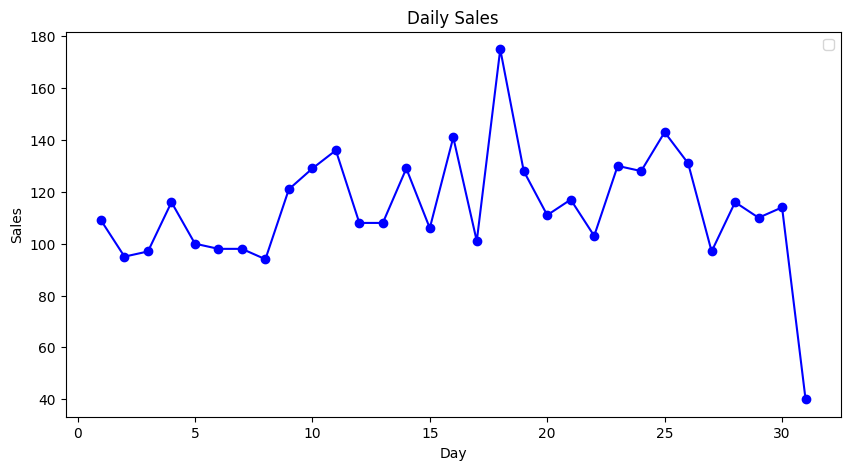

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
mean = data.groupby('Day')['Sales Quantity'].sum()
plt.plot(mean.index, mean, marker='o', linestyle='-', color='b')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Daily Sales')
plt.legend()
plt.show()

In [11]:
df_sum = data.groupby([pd.Grouper(key='Date'),
                       pd.Grouper(key='Mode')])['Sales Quantity'].sum().reset_index()
df_sum

data_sum_daily = pd.DataFrame(df_sum)

In [12]:
df_sum = data.groupby([pd.Grouper(key='Date'),
                       pd.Grouper(key='Mode')])['Sales Quantity'].sum().reset_index()

data_sum_daily = pd.DataFrame(df_sum)

data_transpose = data_sum_daily.pivot(index='Date', columns= 'Mode', values='Sales Quantity')

In [13]:
data_sum_daily

,Date,Mode,Sales Quantity
0,2023-01-09,Dine in,14
1,2023-01-09,Online,1
2,2023-01-10,Dine in,18
3,2023-01-10,Online,2
4,2023-01-11,Dine in,16
...,...,...,...
247,2023-06-27,Dine in,17
248,2023-06-28,Dine in,23
249,2023-06-29,Dine in,26
250,2023-06-30,Dine in,30


In [14]:
data_transpose = data_sum_daily.pivot(index='Date', columns= 'Mode', values='Sales Quantity')
data_transpose

Mode,Dine in,Online,Take Away
Date,,,
2023-01-09,14.0,1.0,NaN
2023-01-10,18.0,2.0,NaN
2023-01-11,16.0,NaN,NaN
2023-01-12,12.0,NaN,NaN
2023-01-13,19.0,NaN,NaN
...,...,...,...
2023-06-26,20.0,NaN,NaN
2023-06-27,17.0,NaN,NaN
2023-06-28,23.0,NaN,NaN


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Semarang Weather Data.csv')

In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [ ]:
weather = weather.drop(weather.index[-1])

In [ ]:
weather

,Date,Temperature_Avg (°C),Relative Humidity_Avg (%)
0,2023-01-09,28,84
1,2023-01-10,"27,9",85
2,2023-01-11,"28,3",85
3,2023-01-12,"28,7",80
4,2023-01-13,"27,4",86
...,...,...,...
168,2023-06-26,"27,3",77
169,2023-06-27,"28,6",79
170,2023-06-28,"28,3",78
171,2023-06-29,"28,9",80


In [ ]:
weather['Temperature_Avg (°C)'] = weather['Temperature_Avg (°C)'].str.replace(",",".")

In [ ]:
weather['Temperature_Avg (°C)'] = weather['Temperature_Avg (°C)'].astype(float)

In [ ]:
weather

,Date,Temperature_Avg (°C),Relative Humidity_Avg (%)
0,2023-01-09,28.0,84
1,2023-01-10,27.9,85
2,2023-01-11,28.3,85
3,2023-01-12,28.7,80
4,2023-01-13,27.4,86
...,...,...,...
168,2023-06-26,27.3,77
169,2023-06-27,28.6,79
170,2023-06-28,28.3,78
171,2023-06-29,28.9,80


In [ ]:
data_final = data_transpose.merge(weather, on='Date', how='inner')

In [ ]:
data_final

,Date,Dine in,Online,Take Away,Temperature_Avg (°C),Relative Humidity_Avg (%)
0,2023-01-09,14.0,1.0,NaN,28.0,84
1,2023-01-10,18.0,2.0,NaN,27.9,85
2,2023-01-11,16.0,NaN,NaN,28.3,85
3,2023-01-12,12.0,NaN,NaN,28.7,80
4,2023-01-13,19.0,NaN,NaN,27.4,86
...,...,...,...,...,...,...
166,2023-06-26,20.0,NaN,NaN,27.3,77
167,2023-06-27,17.0,NaN,NaN,28.6,79
168,2023-06-28,23.0,NaN,NaN,28.3,78
169,2023-06-29,26.0,NaN,NaN,28.9,80


In [ ]:
data_final.fillna(0, inplace=True)

In [ ]:
data_final

,Date,Dine in,Online,Take Away,Temperature_Avg (°C),Relative Humidity_Avg (%)
0,2023-01-09,14.0,1.0,0.0,28.0,84
1,2023-01-10,18.0,2.0,0.0,27.9,85
2,2023-01-11,16.0,0.0,0.0,28.3,85
3,2023-01-12,12.0,0.0,0.0,28.7,80
4,2023-01-13,19.0,0.0,0.0,27.4,86
...,...,...,...,...,...,...
166,2023-06-26,20.0,0.0,0.0,27.3,77
167,2023-06-27,17.0,0.0,0.0,28.6,79
168,2023-06-28,23.0,0.0,0.0,28.3,78
169,2023-06-29,26.0,0.0,0.0,28.9,80


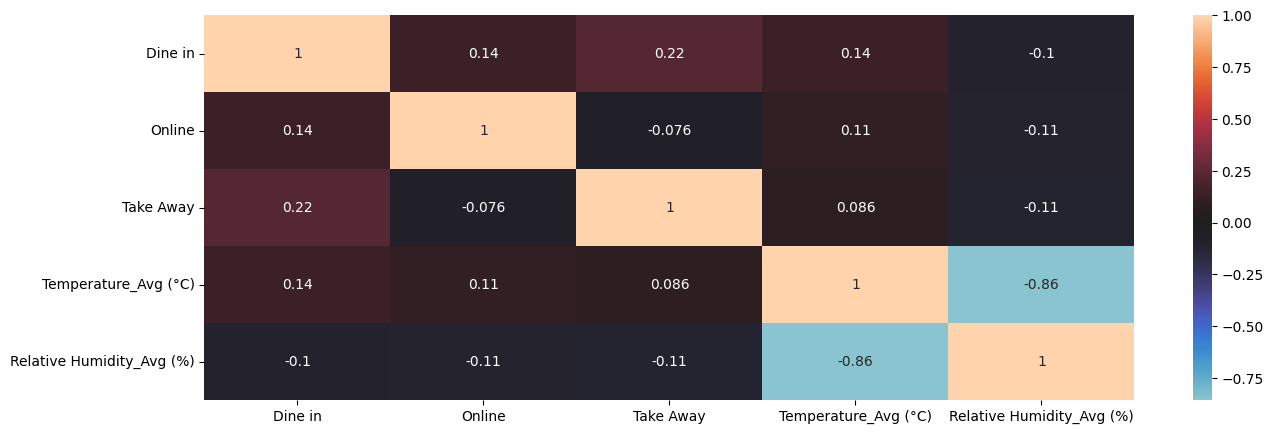

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.heatmap(data_final.corr(),annot=True, center=0,ax=axes)

plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_final[['Temperature_Avg (°C)','Relative Humidity_Avg (%)']],
                                                    data_final[['Dine in','Online','Take Away']], test_size=0.2, random_state=42)


In [ ]:
model = xgb.XGBRegressor(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    objective='reg:squarederror'  # Untuk regresi
)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([[ 3.20230484e+01,  4.34270650e-01,  7.10781753e-01],
       [ 1.32934980e+01,  1.95599735e-01,  1.54000089e-01],
       [ 2.52434578e+01,  4.87159669e-01,  1.02233678e-01],
       [ 1.28537140e+01,  2.58969992e-01,  8.50283921e-01],
       [ 3.01722622e+01,  5.79376459e-01,  7.55799711e-01],
       [ 2.02107487e+01,  1.95599735e-01,  1.54000089e-01],
       [ 1.75685253e+01,  8.31402838e-01,  7.01312184e-01],
       [ 2.60853863e+01,  2.69575715e-01,  1.22399487e-01],
       [ 1.34740772e+01,  3.89836609e-01,  2.33483449e-01],
       [ 1.53508749e+01,  2.12604284e-01,  4.33490813e-01],
       [ 2.20806732e+01,  3.76040787e-01,  4.62009341e-01],
       [ 2.95404797e+01,  5.09912252e-01,  4.18293446e-01],
       [ 8.82058811e+00,  8.38408470e-02,  4.98142727e-02],
       [ 1.85413666e+01,  6.39134586e-01,  7.12331057e-01],
       [ 2.08121719e+01,  9.20615613e-01, -9.93467420e-02],
       [ 1.87548084e+01,  1.37683004e-01,  4.69355613e-01],
       [ 1.93657017e+01,  4.87159669e-01

In [ ]:
pd.DataFrame(predictions)

,0,1,2
0,32.023048,0.434271,0.710782
1,13.293498,0.195600,0.154000
2,25.243458,0.487160,0.102234
3,12.853714,0.258970,0.850284
4,30.172262,0.579376,0.755800
5,20.210749,0.195600,0.154000
6,17.568525,0.831403,0.701312
7,26.085386,0.269576,0.122399
8,13.474077,0.389837,0.233483
9,15.350875,0.212604,0.433491


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 38.25842541629838


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.0752730568649156


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 6.185339555456788


In [ ]:
#Percobaan
new_data = np.array([[28, 86]])
new_prediction = model.predict(new_data)
print(f"Daily Sales Prediction: {new_prediction[0]}")

Daily Sales Prediction: [17.901361    1.4378475   0.31690478]


In [ ]:
import joblib

filename = 'model - prediksi penjualan produk.sav'
joblib.dump(model, filename)

['model - prediksi penjualan produk.sav']